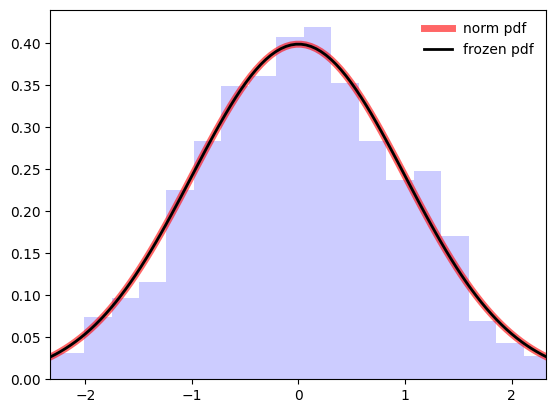

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))
r = norm.rvs(size=1000)

n, bins, _ = ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2, color='b')
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

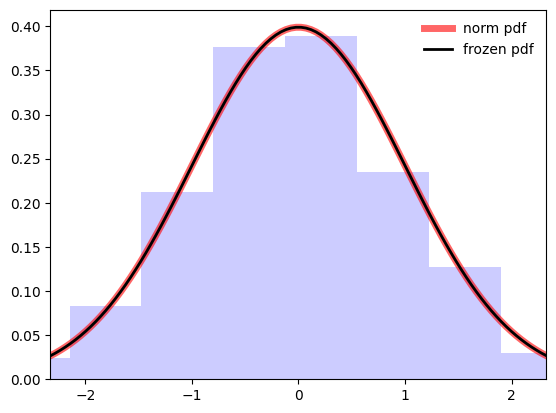

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))
r = norm.rvs(size=1000)

n, bins, _ = ax.hist(r, density=True, bins=10, histtype='stepfilled', alpha=0.2, color='b')
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

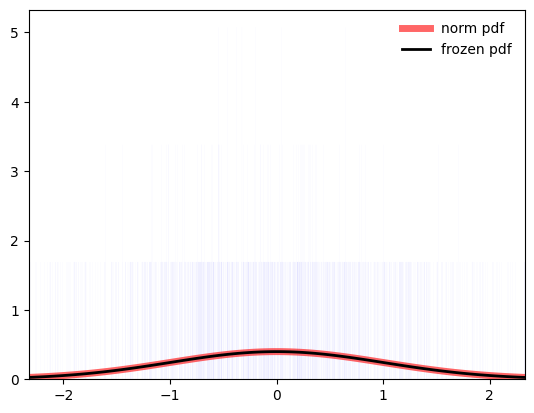

In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))
r = norm.rvs(size=1000)

n, bins, _ = ax.hist(r, density=True, bins=10000, histtype='stepfilled', alpha=0.2, color='b')
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

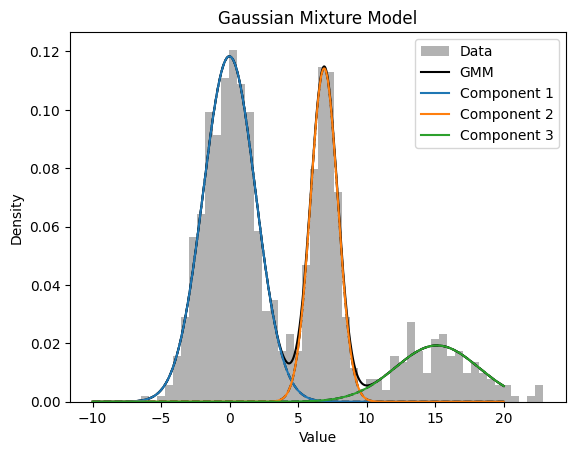

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Step 1: Generate Data
np.random.seed(42)

# Generate samples from N(1, 3)
data1 = np.random.normal(loc=0, scale=2, size=500)

# Generate samples from N(4, 1)
data2 = np.random.normal(loc=7, scale=1, size=250)

# Generate samples from N(7, 2)
data3 = np.random.normal(loc=15, scale=3, size=125)

# Combine the data
data = np.concatenate([data1, data2, data3])

# Step 2: Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(data.reshape(-1, 1))

# Step 3: Visualize the Results
# Generate points for plotting the GMM
x = np.linspace(-10, 20, 1000).reshape(-1, 1)
logprob = gmm.score_samples(x)
pdf = np.exp(logprob)
responsibilities = gmm.predict_proba(x)
pdf_individual = responsibilities * pdf[:, np.newaxis]


# Plot the data histogram
bin_count = 50
hist = plt.hist(data, bins=bin_count, density=True, alpha=0.6, color='gray', label='Data')
digital_labels = np.fmin(np.digitize(data, hist[1]), bin_count)

# Plot the GMM components
plt.plot(x, pdf, '-k', label='GMM')
plt.plot(x, pdf_individual, '--k')

# Plot individual Gaussian components
for i in range(3):
    plt.plot(x, pdf_individual[:, i], label=f'Component {i+1}')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Gaussian Mixture Model')
plt.legend()
plt.show()


In [5]:
def get_cuda_summary(memory=False):
    import torch

    if torch.cuda.is_available():
        print('CUDA device = ', torch.cuda.get_device_name())
        print('Available number of devices = ', torch.cuda.device_count())
        print('Device numbers              = ', list(range(torch.cuda.device_count())))
        print('Current device              = ', torch.cuda.current_device())
        if memory:
            print(torch.cuda.memory_summary())
    else:
        print('cuda is not available')

import torch
get_cuda_summary()
device = torch.device(0) if torch.cuda.is_available() else torch.device('cpu')
torch.cuda.set_device(0) if torch.cuda.is_available() else None

CUDA device =  NVIDIA TITAN RTX
Available number of devices =  1
Device numbers              =  [0]
Current device              =  0


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UnconditionalClassifier(nn.Module):
    def __init__(self, in_size = 1, no_of_classes=50):
        super(UnconditionalClassifier, self).__init__()
        self.in_size = in_size
        self.no_of_classes = no_of_classes
        self.hidden_size = 16
        self.net = nn.Sequential(
            nn.Linear(self.in_size, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, self.no_of_classes),
        )
        
    def forward(self, x):
        x = self.net(x)
        return x

In [7]:
# CROSS ENTROPY LOSS
train_y = torch.from_numpy((digital_labels-1).reshape(-1)).to(device)
train_x = torch.zeros_like(train_y).reshape(-1,1).float().to(device)

model = UnconditionalClassifier().to(device)
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

In [8]:
losses = []
for step in range(2000):
    model.train()
    #yq1, yq2, yq3 = model(x)
    #loss = criterion(input=(yq1, yq2, yq3), target=y)
    logits = model(train_x)
    loss = criterion(logits, train_y)
    losses.append(loss.data.item())
    #print(yqs.shape, train_y_tr.shape)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (step==0) or ((step+1) % 1000 == 0):
        """
        Show your intermediate results
        """
        print('epoch {} loss={:.4}'.format(step+1, loss.data.item()))
        pass

epoch 1 loss=3.986
epoch 1000 loss=3.379
epoch 2000 loss=3.378


In [9]:
def moving_average(a, n=2):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
moving_average(hist[1])

array([-6.18873787, -5.60114425, -5.01355064, -4.42595702, -3.8383634 ,
       -3.25076978, -2.66317617, -2.07558255, -1.48798893, -0.90039531,
       -0.3128017 ,  0.27479192,  0.86238554,  1.44997916,  2.03757277,
        2.62516639,  3.21276001,  3.80035363,  4.38794724,  4.97554086,
        5.56313448,  6.1507281 ,  6.73832171,  7.32591533,  7.91350895,
        8.50110257,  9.08869618,  9.6762898 , 10.26388342, 10.85147704,
       11.43907065, 12.02666427, 12.61425789, 13.20185151, 13.78944512,
       14.37703874, 14.96463236, 15.55222598, 16.13981959, 16.72741321,
       17.31500683, 17.90260045, 18.49019406, 19.07778768, 19.6653813 ,
       20.25297492, 20.84056853, 21.42816215, 22.01575577, 22.60334939])

/tmp/ipykernel_867217/2854001525.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = F.softmax(logits)[0].detach().cpu().numpy()


Text(0.5, 1.0, 'Area under line :77.6%')

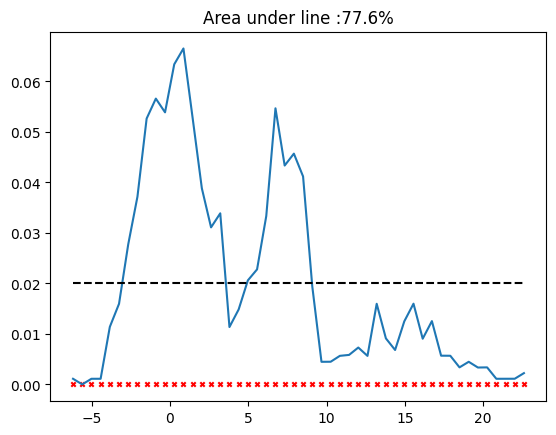

In [26]:
probs = F.softmax(logits)[0].detach().cpu().numpy()
vals = moving_average(hist[1])
plt.plot(vals, probs)

plt.scatter(vals, [0]*len(vals), s=10, marker='x', c='r')

th = 0.02
plt.hlines(y=th, xmin=vals.min(), xmax=vals.max(), colors='black', linestyles='dashed')
plt.title(f"Area under line :{100*probs[probs>0.02].sum():.1f}%")

In [11]:
logits.shape

torch.Size([875, 50])

In [12]:
train_y.shape

torch.Size([875])

In [13]:
def their_loss(logits, target):
    probs = F.softmax(logits)
    log_vals = torch.log(probs)
    neg_entropy = torch.sum()

In [14]:
######### PROTOTYPE 1 ####################33

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UnconditionalProtoClassifier(nn.Module):
    def __init__(self, in_size = 1, no_of_classes=50):
        super(UnconditionalProtoClassifier, self).__init__()
        self.in_size = in_size
        self.no_of_classes = no_of_classes
        self.hidden_size = 16
        self.net = nn.Sequential(
            nn.Linear(self.in_size, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, self.no_of_classes),
        )
        
    def forward(self, x):
        x = self.net(x)
        return x

epoch 1, loss=0.5197, CE_Loss: 0.3923592269420624, MinDist_Loss: 0.1273525357246399
epoch 100, loss=0.4538, CE_Loss: 0.3446004092693329, MinDist_Loss: 0.10922069847583771
epoch 200, loss=0.4541, CE_Loss: 0.3448493480682373, MinDist_Loss: 0.10929854959249496
epoch 300, loss=0.454, CE_Loss: 0.344753623008728, MinDist_Loss: 0.10921639949083328
epoch 400, loss=0.454, CE_Loss: 0.3447439968585968, MinDist_Loss: 0.10927281528711319
epoch 500, loss=0.454, CE_Loss: 0.3448224365711212, MinDist_Loss: 0.10916706919670105
epoch 600, loss=0.454, CE_Loss: 0.3447777032852173, MinDist_Loss: 0.1091999039053917
epoch 700, loss=0.454, CE_Loss: 0.34482985734939575, MinDist_Loss: 0.10914705693721771
epoch 800, loss=0.454, CE_Loss: 0.3448258638381958, MinDist_Loss: 0.10916630923748016
epoch 900, loss=0.454, CE_Loss: 0.3448041081428528, MinDist_Loss: 0.10918135195970535
epoch 1000, loss=0.454, CE_Loss: 0.34475263953208923, MinDist_Loss: 0.10925856232643127


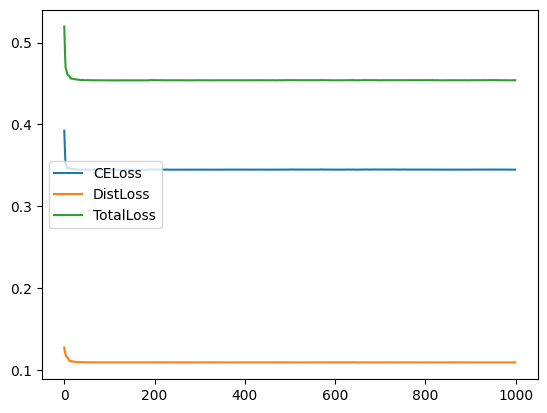

In [24]:
# Plot the data histogram
# bin_count = 50
# hist = plt.hist(data, bins=bin_count, density=True, alpha=0.6, color='gray', label='Data')
# digital_labels = np.fmin(np.digitize(data, hist[1]), bin_count)

bin_count = 50
data_min_val, data_max_val = data.min(), data.max()
protos = nn.Parameter((torch.linspace(0,1,bin_count)*(data_max_val-data_min_val)+data_min_val).to(device) ,requires_grad=True)

# CROSS ENTROPY LOSS
train_y = torch.from_numpy(data.reshape(-1).astype(np.float32)).to(device)
train_x = torch.zeros_like(train_y).reshape(-1,1).float().to(device)

model = UnconditionalProtoClassifier(no_of_classes=bin_count).to(device)
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=list(model.parameters())+ [protos], lr=0.05)

ce_losses = []
mindist_losses = []

losses = []
for step in range(1000):
    model.train()
    optimizer.zero_grad()
    #yq1, yq2, yq3 = model(x)
    #loss = criterion(input=(yq1, yq2, yq3), target=y)
    logits = model(train_x)
    
    cdist_list = torch.cdist(train_y.view(-1,1), protos.view(-1,1), p=2)
    mindist, pos = torch.min(cdist_list, dim=1)
    
    lambda_fact = 0.9
    ce_loss = (1-lambda_fact) * criterion(logits, pos)
    mindist_loss = lambda_fact * torch.mean(mindist)
    loss = ce_loss + mindist_loss
    
    ce_losses.append(ce_loss.data.item())
    mindist_losses.append(mindist_loss.data.item())
    losses.append(loss.data.item())
    #print(yqs.shape, train_y_tr.shape)
    loss.backward()
    optimizer.step()

    if (step==0) or ((step+1) % 100 == 0):
        """
        Show your intermediate results
        """
        print(f'epoch {step+1}, loss={loss.data.item():.4}, CE_Loss: {ce_loss.data.item()}, MinDist_Loss: {mindist_loss.data.item()}')
        pass
plt.plot(ce_losses, label='CELoss')
plt.plot(mindist_losses, label='DistLoss')
plt.plot(losses, label='TotalLoss')
plt.legend()

/tmp/ipykernel_867217/1563468914.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = F.softmax(logits)[0].detach().cpu().numpy()


Text(0.5, 1.0, 'Area under line :77.6%')

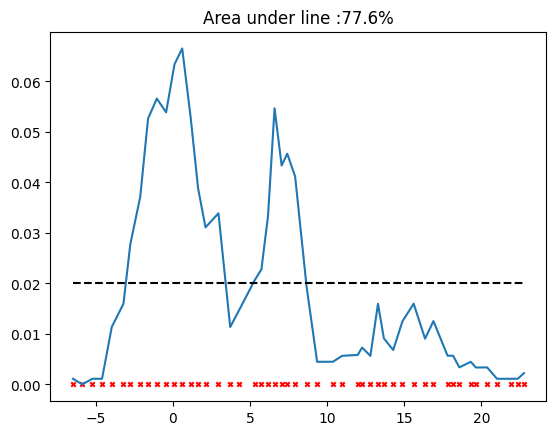

In [25]:
probs = F.softmax(logits)[0].detach().cpu().numpy()
vals = protos.cpu().detach().numpy()
plt.plot(vals, probs)

plt.scatter(protos.detach().cpu().numpy(),[0]*len(protos), s=10, marker='x', c='r')

th = 0.02
plt.hlines(y=th, xmin=vals.min(), xmax=vals.max(), colors='black', linestyles='dashed')
plt.title(f"Area under line :{100*probs[probs>0.02].sum():.1f}%")

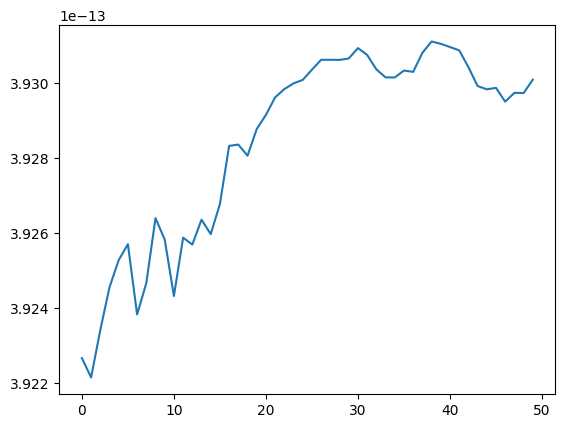

In [18]:
plt.plot(ce_losses[:50])

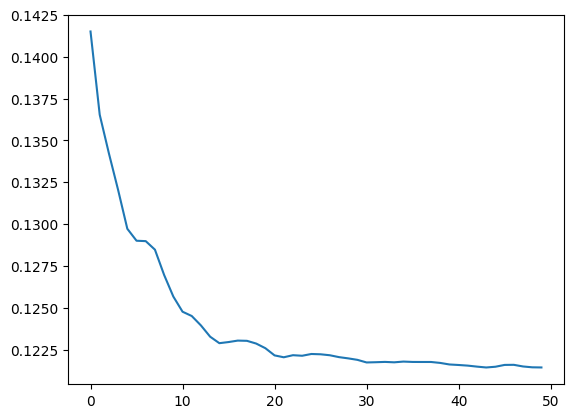

In [19]:
plt.plot(mindist_losses[:50])